#### Importing the dependencies

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [152]:
df = pd.read_csv("D:\\Data Science\\Projects\\loan pred\\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [153]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Preprocessing tha dataset

In [155]:
# finding null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [156]:
# filling the null values with mean (numerical terms)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [157]:
# filling the null values with mode (categorical terms)
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [158]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

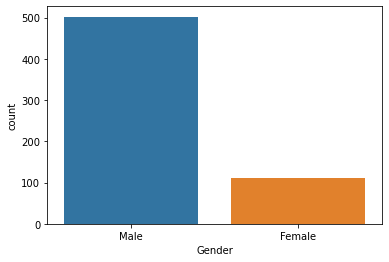

In [159]:
# categorical attributes visualization
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

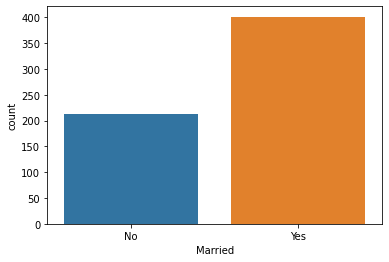

In [160]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

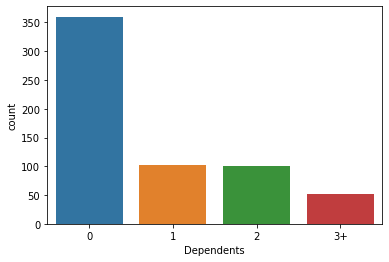

In [161]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

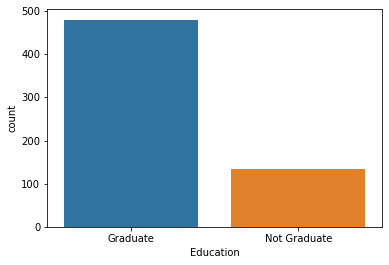

In [162]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

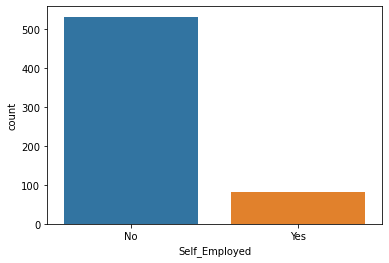

In [163]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

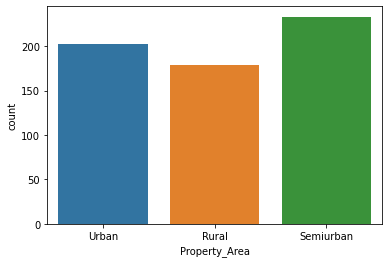

In [164]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

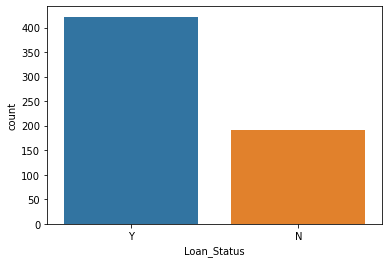

In [165]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

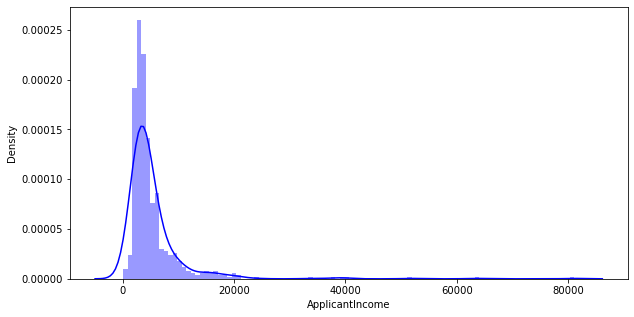

In [166]:
# numerical attributes visualization
plt.figure(figsize=(10, 5))
sns.distplot(df["ApplicantIncome"], bins = 100,  color = 'blue')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

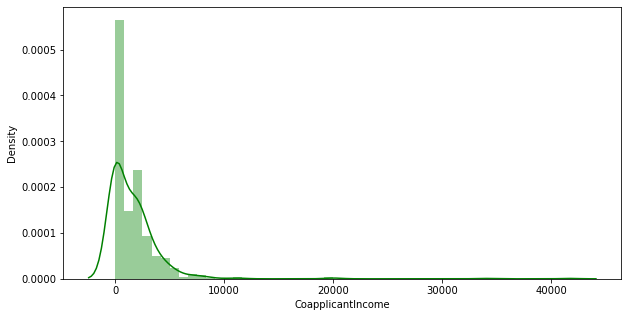

In [167]:
plt.figure(figsize=(10, 5))
sns.distplot(df["CoapplicantIncome"], bins = 50, color = 'green')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

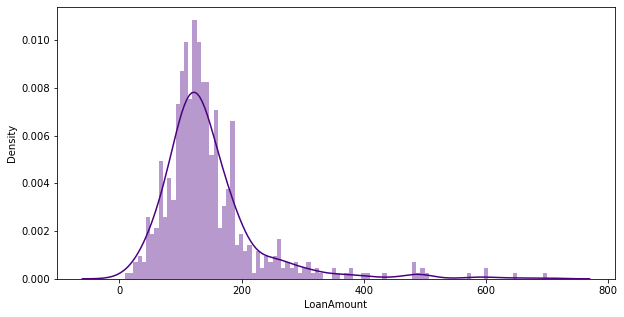

In [168]:
plt.figure(figsize=(10, 5))
sns.distplot(df["LoanAmount"], bins = 100, color = 'indigo')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

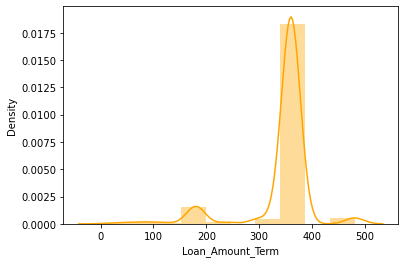

In [169]:
# plt.figure(figsize=(10, 5))
sns.distplot(df['Loan_Amount_Term'], bins=10, color = 'orange')

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

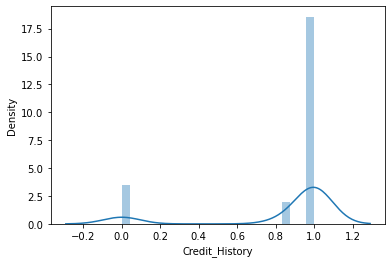

In [170]:
sns.distplot(df['Credit_History'])

#### Creating of new attributes

In [171]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


#### Log Transformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

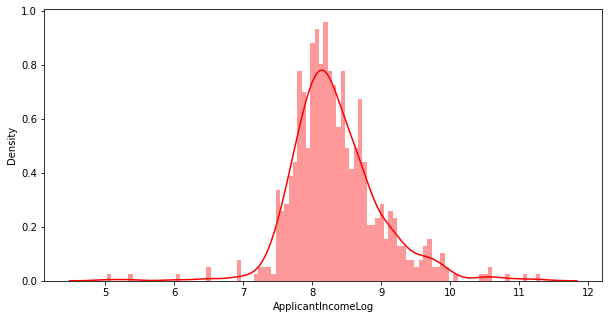

In [172]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
plt.figure(figsize=(10, 5))
sns.distplot(df["ApplicantIncomeLog"], bins=100, color = 'red')

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

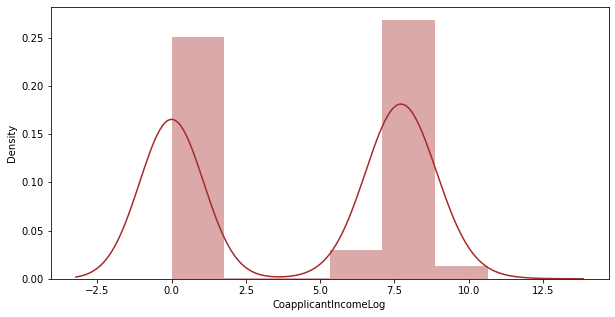

In [173]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
plt.figure(figsize=(10, 5))
sns.distplot(df["CoapplicantIncomeLog"], color = 'brown')

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

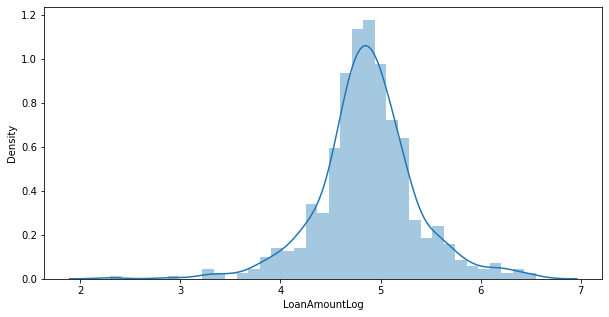

In [174]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
plt.figure(figsize=(10, 5))
sns.distplot(df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

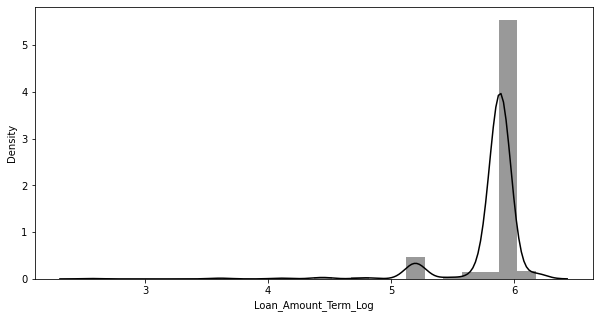

In [175]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
plt.figure(figsize=(10, 5))
sns.distplot(df["Loan_Amount_Term_Log"], color = 'black')

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

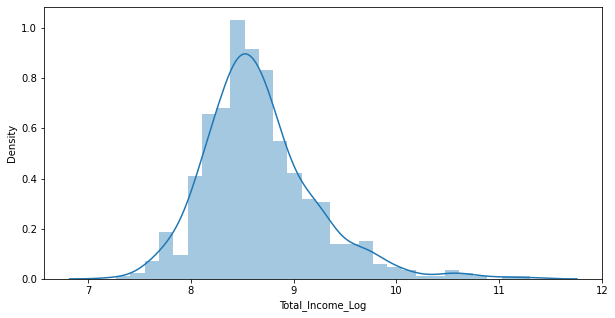

In [176]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
plt.figure(figsize=(10, 5))
sns.distplot(df["Total_Income_Log"])

## Coorelation Matrix

<AxesSubplot:>

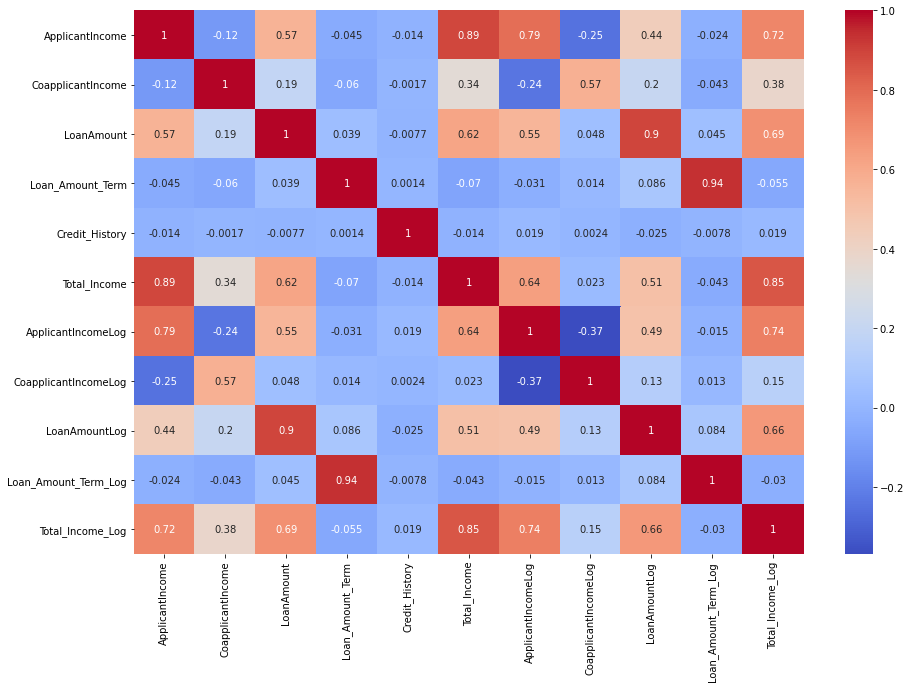

In [177]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="coolwarm")

In [178]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [179]:
# dropping columns that is not required
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


## Label Encoding

In [180]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [181]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


#### Train-Test Split

In [182]:
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Training the model

In [184]:
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
def classify(model, x, y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [185]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [186]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 72.07792207792207
Cross validation is 71.50339864054378


In [187]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 79.32027189124351


In [188]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 77.5303212048514


In [189]:
from sklearn import svm
model = svm.SVC(kernel='linear')
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


#### SVM and Logistic Regression has the best model accuracy

In [190]:
#determining purchase from the test variable
df2 = pd.read_csv("D:\\Data Science\\Projects\\loan pred\\test_Y3wMUE5_7gLdaTN.csv")
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [191]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [192]:
df2['Gender'] = df2["Gender"].fillna(df2['Gender'].mode()[0])
df2['Dependents'] = df2["Dependents"].fillna(df2['Dependents'].mode()[0])
df2['Self_Employed'] = df2["Self_Employed"].fillna(df2['Self_Employed'].mode()[0])

df2['LoanAmount'] = df2['LoanAmount'].fillna(df2['LoanAmount'].mean())
df2['Loan_Amount_Term'] = df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean())
df2['Credit_History'] = df2['Credit_History'].fillna(df2['Credit_History'].mean())

In [193]:
df2['Total_Income'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']
df2['ApplicantIncomeLog'] = np.log(df2['ApplicantIncome']+1)
df2['CoapplicantIncomeLog'] = np.log(df2['CoapplicantIncome']+1)
df2['LoanAmountLog'] = np.log(df2['LoanAmount']+1)
df2['Loan_Amount_Term_Log'] = np.log(df2['Loan_Amount_Term']+1)
df2['Total_Income_Log'] = np.log(df2['Total_Income']+1)
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,5720,8.651899,0.000000,4.709530,5.888878,8.651899
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4576,8.031710,7.313887,4.844187,5.888878,8.428799
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,6800,8.517393,7.496097,5.342334,5.888878,8.824825
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4886,7.758333,7.842671,4.615121,5.888878,8.494334
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,3276,8.094684,0.000000,4.369448,5.888878,8.094684


In [194]:
final_df = pd.DataFrame()
final_df['Loan ID'] = df2['Loan_ID']

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
X_test = df2.drop(columns=cols, axis=1)

X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,Yes,0,Graduate,No,1.000000,Urban,8.651899,4.709530,5.888878,8.651899
1,Male,Yes,1,Graduate,No,1.000000,Urban,8.031710,4.844187,5.888878,8.428799
2,Male,Yes,2,Graduate,No,1.000000,Urban,8.517393,5.342334,5.888878,8.824825
3,Male,Yes,2,Graduate,No,0.825444,Urban,7.758333,4.615121,5.888878,8.494334
4,Male,No,0,Not Graduate,No,1.000000,Urban,8.094684,4.369448,5.888878,8.094684


In [195]:
colss = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Dependents"]
le = LabelEncoder()
for col in colss:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()    

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,1,0,0,0,1.000000,2,8.651899,4.709530,5.888878,8.651899
1,1,1,1,0,0,1.000000,2,8.031710,4.844187,5.888878,8.428799
2,1,1,2,0,0,1.000000,2,8.517393,5.342334,5.888878,8.824825
3,1,1,2,0,0,0.825444,2,7.758333,4.615121,5.888878,8.494334
4,1,0,0,1,0,1.000000,2,8.094684,4.369448,5.888878,8.094684


In [197]:
#Using Support Vector Machine on the test dataset

pred = model.predict(X_test)

final_df['Loan status predicted'] = pred
status = {0:'No', 1:'Yes'}
final_df['Loan status predicted'] = final_df['Loan status predicted'].apply(lambda x: status[x])
final_df.head()
# final_df.to_csv('submission.csv', index=False)

,Loan ID,Loan status predicted
0,LP001015,Yes
1,LP001022,Yes
2,LP001031,Yes
3,LP001035,Yes
4,LP001051,Yes
